<a href="https://colab.research.google.com/github/Bengiawilliam/temporal-fusion-transformer-project/blob/main/TemporalFusionTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
df = yf.download("BTC-USD", period="30d", interval="5m")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('btc_6months_15min.csv')

In [5]:
df.columns

Index(['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time'], dtype='object')

In [6]:
df.set_index('Open Time', inplace=True)

In [7]:
import matplotlib.pyplot as plt
df_last_200 = df.iloc[len(df)-200:,:]

In [8]:
df_last_200

,Open,High,Low,Close,Volume,Close Time
Open Time,,,,,,
2024-12-21 18:00:00,97853.25,97853.26,97471.00,97505.51,443.92326,2024-12-21 18:14:59
2024-12-21 18:15:00,97505.50,97683.24,97105.26,97131.99,684.00692,2024-12-21 18:29:59
2024-12-21 18:30:00,97132.00,97500.48,97099.43,97408.17,417.07310,2024-12-21 18:44:59
2024-12-21 18:45:00,97408.18,97429.99,96538.88,96655.49,876.62656,2024-12-21 18:59:59
2024-12-21 19:00:00,96655.49,97408.00,96398.39,97299.28,834.27995,2024-12-21 19:14:59
...,...,...,...,...,...,...
2024-12-23 18:45:00,95858.41,95938.61,95723.07,95795.24,183.40176,2024-12-23 18:59:59
2024-12-23 19:00:00,95795.25,95877.49,94974.55,95120.54,438.31658,2024-12-23 19:14:59
2024-12-23 19:15:00,95120.54,95318.75,94832.93,94924.34,373.31877,2024-12-23 19:29:59


In [9]:
df.describe()

,Open,High,Low,Close,Volume
count,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000
mean,70831.160414,70958.457375,70699.679123,70833.110863,328.697781
std,15084.390448,15114.175334,15049.996848,15085.391014,393.274444
min,49732.560000,50273.730000,49000.000000,49732.570000,16.845050
25%,60201.520000,60317.390000,60116.000000,60201.530000,123.866175
50%,64289.995000,64397.995000,64182.935000,64290.005000,209.131195
75%,76223.525000,76323.557500,76063.060000,76224.992500,382.139275
max,108258.380000,108353.000000,107721.800000,108258.390000,9136.883710


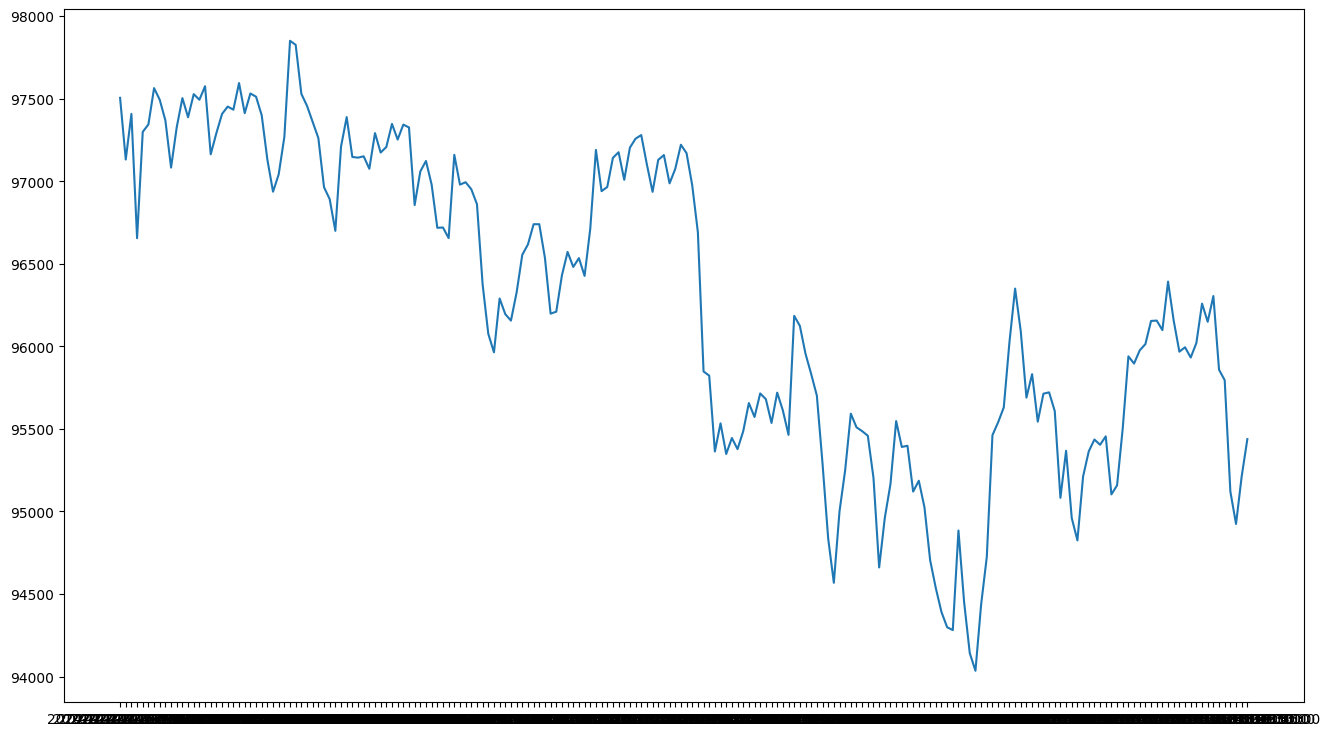

In [10]:
plt.figure(figsize=(16,9))
plt.plot(df_last_200['Close'])

In [11]:
df.drop(columns=['Close Time'], inplace = True)

In [12]:
df.columns = df.columns.get_level_values(0)

In [13]:
import numpy as np

In [14]:
df = df.fillna(np.nan)

In [15]:
df = df.iloc[:-1,:]

In [16]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [17]:
df

,Open,High,Low,Close,Volume
Open Time,,,,,
2024-06-26 20:00:00,61659.80,61787.50,61549.61,61678.00,261.35105
2024-06-26 20:15:00,61677.99,61880.00,61656.00,61728.13,172.11652
2024-06-26 20:30:00,61728.13,61766.00,61225.66,61280.69,561.10378
2024-06-26 20:45:00,61280.69,61484.00,61255.77,61378.01,239.54013
2024-06-26 21:00:00,61378.00,61435.45,61182.80,61315.48,306.54756
...,...,...,...,...,...
2024-12-23 18:30:00,96305.00,96350.00,95854.54,95858.42,167.50049
2024-12-23 18:45:00,95858.41,95938.61,95723.07,95795.24,183.40176
2024-12-23 19:00:00,95795.25,95877.49,94974.55,95120.54,438.31658


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17279 entries, 2024-06-26 20:00:00 to 2024-12-23 19:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    17279 non-null  float64
 1   High    17279 non-null  float64
 2   Low     17279 non-null  float64
 3   Close   17279 non-null  float64
 4   Volume  17279 non-null  float64
dtypes: float64(5)
memory usage: 810.0+ KB


In [19]:
!pip install ta

In [20]:
import ta

In [21]:
df['rsi'] = ta.momentum.rsi(df['Close'], window=14)

In [22]:
df['atr'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], window=14).average_true_range()

In [23]:
df['bollinger_h'] = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2).bollinger_hband()

In [24]:
df['bollinger_l'] = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2).bollinger_lband()

In [25]:
df['bollinger_m'] = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2).bollinger_mavg()

In [26]:
df['macd_diff'] = ta.trend.macd_diff(df['Close'])

In [27]:
df['macd_signal'] = ta.trend.macd_signal(df['Close'])

In [28]:
df ['macd'] = ta.trend.macd(df['Close'])

In [29]:
import matplotlib.pyplot as plt

In [30]:
first_100 = df.iloc[:50][:]

In [31]:
first_100

,Open,High,Low,Close,Volume,rsi,atr,bollinger_h,bollinger_l,bollinger_m,macd_diff,macd_signal,macd
Open Time,,,,,,,,,,,,,
2024-06-26 20:00:00,61659.80,61787.50,61549.61,61678.00,261.35105,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 20:15:00,61677.99,61880.00,61656.00,61728.13,172.11652,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 20:30:00,61728.13,61766.00,61225.66,61280.69,561.10378,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 20:45:00,61280.69,61484.00,61255.77,61378.01,239.54013,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 21:00:00,61378.00,61435.45,61182.80,61315.48,306.54756,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 21:15:00,61315.48,61481.06,61305.56,61467.86,156.68404,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 21:30:00,61467.85,61521.83,61373.20,61521.83,243.36046,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 21:45:00,61521.83,61529.27,61396.00,61492.00,168.34749,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 22:00:00,61492.00,61547.02,61434.00,61446.00,153.29613,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df['Volume'] = df['Volume'].replace(0,np.nan)

In [33]:
df

,Open,High,Low,Close,Volume,rsi,atr,bollinger_h,bollinger_l,bollinger_m,macd_diff,macd_signal,macd
Open Time,,,,,,,,,,,,,
2024-06-26 20:00:00,61659.80,61787.50,61549.61,61678.00,261.35105,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 20:15:00,61677.99,61880.00,61656.00,61728.13,172.11652,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 20:30:00,61728.13,61766.00,61225.66,61280.69,561.10378,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 20:45:00,61280.69,61484.00,61255.77,61378.01,239.54013,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 21:00:00,61378.00,61435.45,61182.80,61315.48,306.54756,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 18:30:00,96305.00,96350.00,95854.54,95858.42,167.50049,49.857482,344.100727,96610.706815,95292.745185,95951.7260,-20.907559,186.969952,166.062392
2024-12-23 18:45:00,95858.41,95938.61,95723.07,95795.24,183.40176,48.568452,334.917818,96525.266409,95447.359591,95986.3130,-42.308909,176.392724,134.083816
2024-12-23 19:00:00,95795.25,95877.49,94974.55,95120.54,438.31658,37.437049,375.490831,96535.102071,95433.748929,95984.4255,-98.170874,151.850006,53.679132


In [34]:
df['Volume'].ffill(inplace=True)

<ipython-input-34-93161ad82f12>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Volume'].ffill(inplace=True)


In [35]:
df['Volume'].min()

16.84505

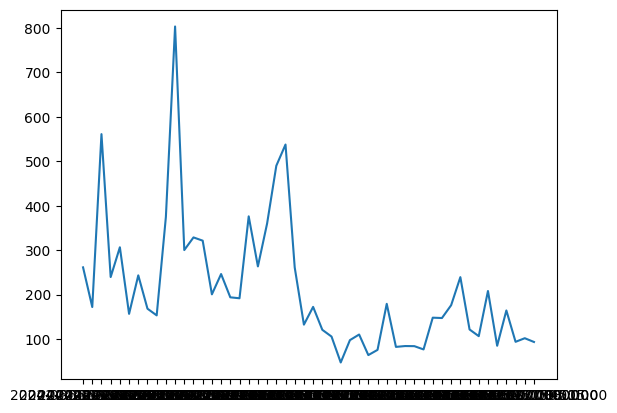

In [36]:
plt.plot(first_100['Volume'])

<ipython-input-37-c34706080afa>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


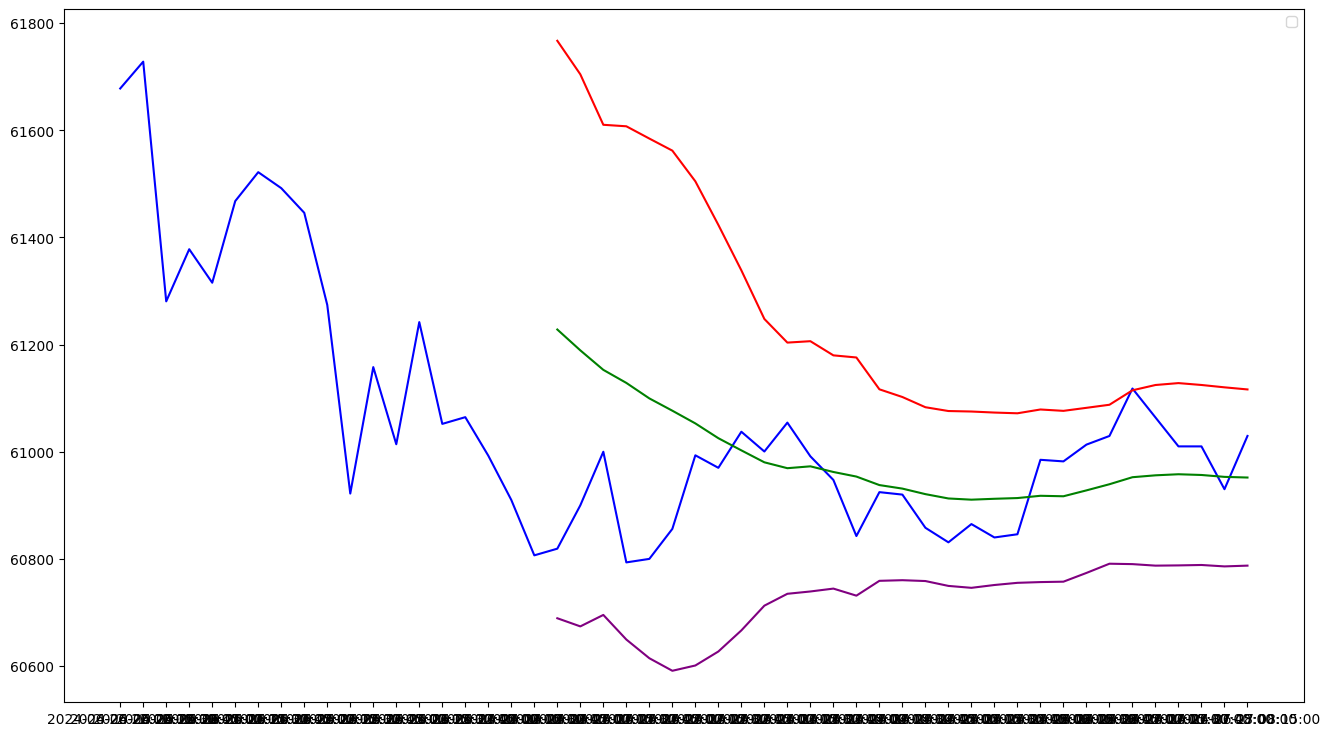

In [37]:
plt.figure(figsize=(16,9))
plt.plot(first_100['Close'], color='blue')
plt.plot(first_100['bollinger_h'], color='red')
plt.plot(first_100['bollinger_l'], color='purple')
plt.plot(first_100['bollinger_m'], color ='green')
plt.legend()
plt.show()



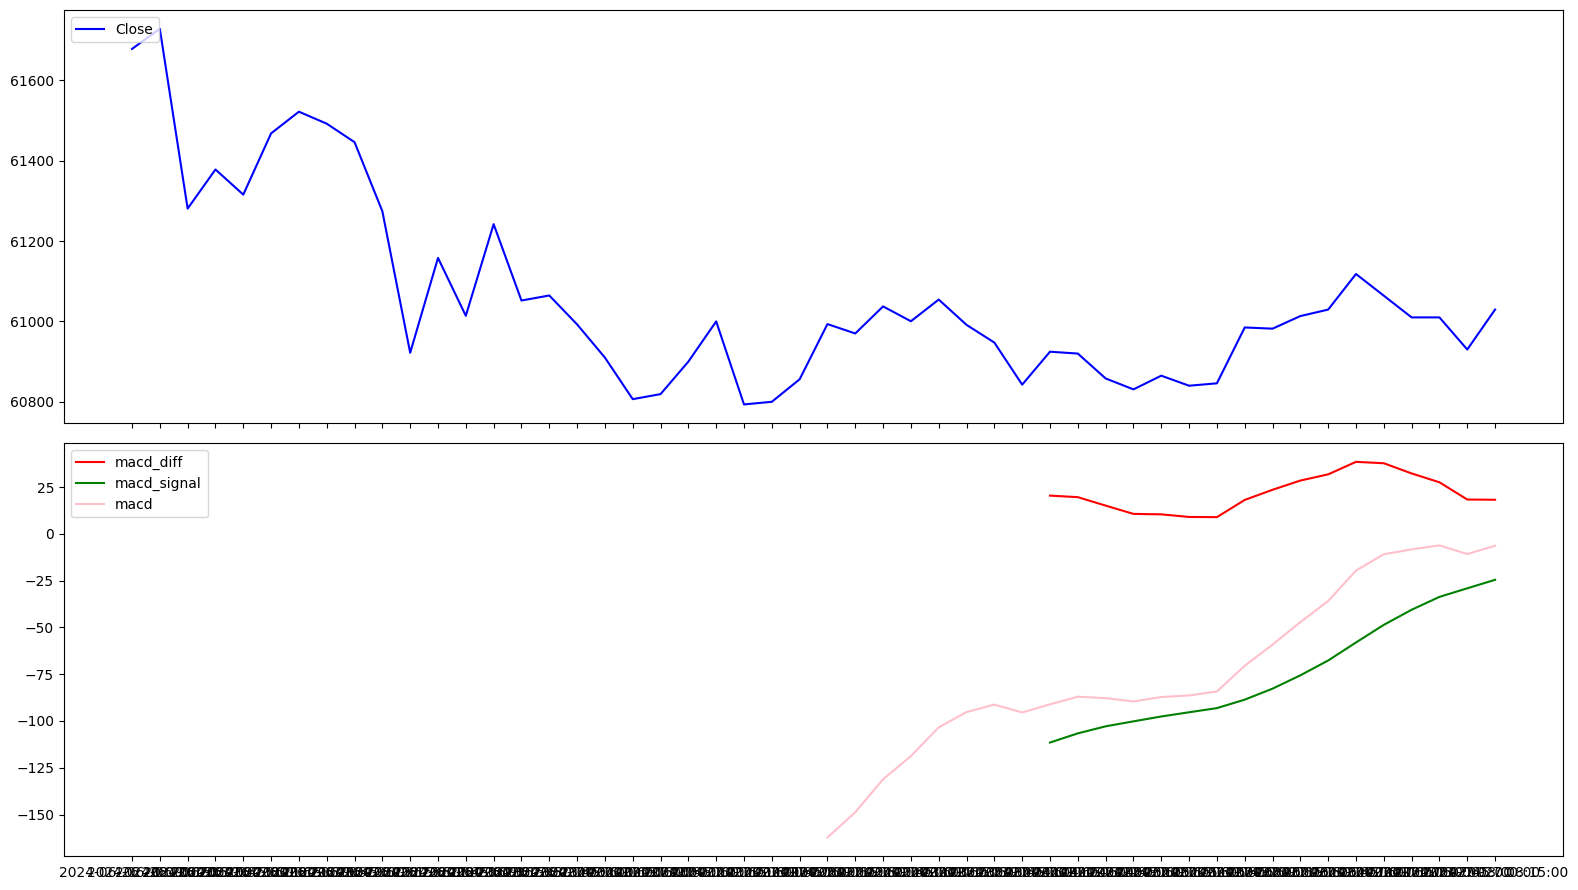

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9), sharex = True)
ax1.plot(first_100['Close'], color='blue', label="Close")
ax1.legend(loc="upper left")
ax2.plot(first_100['macd_diff'], color='red', label="macd_diff")
ax2.plot(first_100['macd_signal'], color='green', label="macd_signal")
ax2.plot(first_100['macd'], color='pink', label="macd")
ax2.legend(loc="upper left")
plt.tight_layout()
plt.show()


In [39]:
df

,Open,High,Low,Close,Volume,rsi,atr,bollinger_h,bollinger_l,bollinger_m,macd_diff,macd_signal,macd
Open Time,,,,,,,,,,,,,
2024-06-26 20:00:00,61659.80,61787.50,61549.61,61678.00,261.35105,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 20:15:00,61677.99,61880.00,61656.00,61728.13,172.11652,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 20:30:00,61728.13,61766.00,61225.66,61280.69,561.10378,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 20:45:00,61280.69,61484.00,61255.77,61378.01,239.54013,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-26 21:00:00,61378.00,61435.45,61182.80,61315.48,306.54756,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 18:30:00,96305.00,96350.00,95854.54,95858.42,167.50049,49.857482,344.100727,96610.706815,95292.745185,95951.7260,-20.907559,186.969952,166.062392
2024-12-23 18:45:00,95858.41,95938.61,95723.07,95795.24,183.40176,48.568452,334.917818,96525.266409,95447.359591,95986.3130,-42.308909,176.392724,134.083816
2024-12-23 19:00:00,95795.25,95877.49,94974.55,95120.54,438.31658,37.437049,375.490831,96535.102071,95433.748929,95984.4255,-98.170874,151.850006,53.679132


In [40]:
df.dropna(inplace=True)

In [41]:
df['time_idx'] = range(0,len(df))

In [42]:
df

,Open,High,Low,Close,Volume,rsi,atr,bollinger_h,bollinger_l,bollinger_m,macd_diff,macd_signal,macd,time_idx
Open Time,,,,,,,,,,,,,,
2024-06-27 04:15:00,60842.10,60935.78,60783.13,60924.61,179.28816,43.874855,182.411753,61116.536063,60759.070937,60937.8035,20.401947,-111.503942,-91.101995,0
2024-06-27 04:30:00,60924.61,60969.79,60870.00,60920.01,82.40398,43.682008,176.510199,61102.159009,60760.247991,60931.2035,19.577056,-106.609678,-87.032622,1
2024-06-27 04:45:00,60920.01,60920.01,60783.26,60858.09,84.30555,41.065453,173.670185,61083.091436,60758.669564,60920.8805,15.054119,-102.846148,-87.792029,2
2024-06-27 05:00:00,60858.09,60911.00,60812.87,60830.93,84.07260,39.935476,168.274457,61076.008777,60749.580223,60912.7945,10.634409,-100.187546,-89.553136,3
2024-06-27 05:15:00,60830.93,60864.99,60791.35,60864.99,76.70463,42.087585,161.514853,61075.085207,60746.000793,60910.5430,10.393768,-97.589104,-87.195336,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 18:30:00,96305.00,96350.00,95854.54,95858.42,167.50049,49.857482,344.100727,96610.706815,95292.745185,95951.7260,-20.907559,186.969952,166.062392,17241
2024-12-23 18:45:00,95858.41,95938.61,95723.07,95795.24,183.40176,48.568452,334.917818,96525.266409,95447.359591,95986.3130,-42.308909,176.392724,134.083816,17242
2024-12-23 19:00:00,95795.25,95877.49,94974.55,95120.54,438.31658,37.437049,375.490831,96535.102071,95433.748929,95984.4255,-98.170874,151.850006,53.679132,17243


In [43]:
import torch

In [44]:
!pip install pytorch-forecasting

In [45]:
from pytorch_forecasting import TimeSeriesDataSet

In [46]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'rsi', 'atr', 'bollinger_h',
       'bollinger_l', 'bollinger_m', 'macd_diff', 'macd_signal', 'macd',
       'time_idx'],
      dtype='object')

In [47]:
#df.drop(columns=['unix','Volume BTC'], inplace=True)

In [48]:
df['daysofweek'] = pd.to_datetime(df.index).dayofweek

In [49]:
df

,Open,High,Low,Close,Volume,rsi,atr,bollinger_h,bollinger_l,bollinger_m,macd_diff,macd_signal,macd,time_idx,daysofweek
Open Time,,,,,,,,,,,,,,,
2024-06-27 04:15:00,60842.10,60935.78,60783.13,60924.61,179.28816,43.874855,182.411753,61116.536063,60759.070937,60937.8035,20.401947,-111.503942,-91.101995,0,3
2024-06-27 04:30:00,60924.61,60969.79,60870.00,60920.01,82.40398,43.682008,176.510199,61102.159009,60760.247991,60931.2035,19.577056,-106.609678,-87.032622,1,3
2024-06-27 04:45:00,60920.01,60920.01,60783.26,60858.09,84.30555,41.065453,173.670185,61083.091436,60758.669564,60920.8805,15.054119,-102.846148,-87.792029,2,3
2024-06-27 05:00:00,60858.09,60911.00,60812.87,60830.93,84.07260,39.935476,168.274457,61076.008777,60749.580223,60912.7945,10.634409,-100.187546,-89.553136,3,3
2024-06-27 05:15:00,60830.93,60864.99,60791.35,60864.99,76.70463,42.087585,161.514853,61075.085207,60746.000793,60910.5430,10.393768,-97.589104,-87.195336,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 18:30:00,96305.00,96350.00,95854.54,95858.42,167.50049,49.857482,344.100727,96610.706815,95292.745185,95951.7260,-20.907559,186.969952,166.062392,17241,0
2024-12-23 18:45:00,95858.41,95938.61,95723.07,95795.24,183.40176,48.568452,334.917818,96525.266409,95447.359591,95986.3130,-42.308909,176.392724,134.083816,17242,0
2024-12-23 19:00:00,95795.25,95877.49,94974.55,95120.54,438.31658,37.437049,375.490831,96535.102071,95433.748929,95984.4255,-98.170874,151.850006,53.679132,17243,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17246 entries, 2024-06-27 04:15:00 to 2024-12-23 19:30:00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         17246 non-null  float64
 1   High         17246 non-null  float64
 2   Low          17246 non-null  float64
 3   Close        17246 non-null  float64
 4   Volume       17246 non-null  float64
 5   rsi          17246 non-null  float64
 6   atr          17246 non-null  float64
 7   bollinger_h  17246 non-null  float64
 8   bollinger_l  17246 non-null  float64
 9   bollinger_m  17246 non-null  float64
 10  macd_diff    17246 non-null  float64
 11  macd_signal  17246 non-null  float64
 12  macd         17246 non-null  float64
 13  time_idx     17246 non-null  int64  
 14  daysofweek   17246 non-null  int32  
dtypes: float64(13), int32(1), int64(1)
memory usage: 2.0+ MB


In [51]:
from pytorch_forecasting.data import GroupNormalizer

In [52]:
max_prediction_length=12

In [53]:
max_encoder_length = 512
max_prediction_length = 12

In [54]:
df['group_id'] = "0"

In [55]:
training = TimeSeriesDataSet(
    df[:len(df)-30],
    target = "Close",
    time_idx= "time_idx",
    group_ids = ["group_id"],
    min_encoder_length = max_encoder_length-256,
    max_encoder_length = max_encoder_length,
    min_prediction_length = 1,
    max_prediction_length = max_prediction_length,
    time_varying_known_reals = ['rsi', 'atr', 'bollinger_h', 'bollinger_l', 'bollinger_m', 'macd_diff', 'macd_signal', 'macd',"time_idx","daysofweek"],
    time_varying_unknown_reals = ['Close','Volume','High', 'Open', 'Low'],
    target_normalizer=GroupNormalizer(
        groups=["group_id"], transformation="softplus"
    ),
    add_relative_time_idx = True,
    add_target_scales = False,
    add_encoder_length = True,
)

In [56]:
validation = TimeSeriesDataSet.from_dataset(training, df, predict=True, stop_randomization=True)

In [57]:
batch_size = 256
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=4)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=4)

In [58]:
!pip install torch-optimizer

In [59]:
import torch_optimizer as optim

In [60]:
from pytorch_forecasting import TemporalFusionTransformer

In [61]:
from pytorch_forecasting.metrics import QuantileLoss

In [62]:
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=256,
    attention_head_size=4,
    dropout=0.1,
    lstm_layers=3,
    log_interval = 10,
    loss = QuantileLoss(),
    optimizer = optim.RangerQH,
    reduce_on_plateau_patience=4,


)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [63]:
import lightning.pytorch as pl

In [64]:
trainer = pl.Trainer(
    max_epochs=128,
    accelerator="gpu",           # Ensure GPU is explicitly used
    devices=1,                   # or 'auto' is fine if only one GPU is available
    gradient_clip_val=0.1,      # ⛏️ Prevent gradient explosions in TFT
    log_every_n_steps=10,
)

INFO: Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [65]:
import torch

In [66]:
tft.train()
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO: You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name                               | Type                            | Params | Mode

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pytorch_ranger/rangerqh.py:152: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha = 1) (Triggered internally at /pytorch/torch/csrc/utils/python_arg_parser.cpp:1661.)
  exp_avg.mul_(beta1_adj).add_(1.0 - beta1_adj, d_p)


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=128` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=128` reached.


In [67]:
trainer.save_checkpoint("tft_model.ckpt")


In [70]:


# Save dataset (contains variable encodings, scalers, etc.)
import pickle
with open("tft_dataset.pkl", "wb") as f:
    pickle.dump(training, f)

In [71]:
df

,Open,High,Low,Close,Volume,rsi,atr,bollinger_h,bollinger_l,bollinger_m,macd_diff,macd_signal,macd,time_idx,daysofweek,group_id
Open Time,,,,,,,,,,,,,,,,
2024-06-27 04:15:00,60842.10,60935.78,60783.13,60924.61,179.28816,43.874855,182.411753,61116.536063,60759.070937,60937.8035,20.401947,-111.503942,-91.101995,0,3,0
2024-06-27 04:30:00,60924.61,60969.79,60870.00,60920.01,82.40398,43.682008,176.510199,61102.159009,60760.247991,60931.2035,19.577056,-106.609678,-87.032622,1,3,0
2024-06-27 04:45:00,60920.01,60920.01,60783.26,60858.09,84.30555,41.065453,173.670185,61083.091436,60758.669564,60920.8805,15.054119,-102.846148,-87.792029,2,3,0
2024-06-27 05:00:00,60858.09,60911.00,60812.87,60830.93,84.07260,39.935476,168.274457,61076.008777,60749.580223,60912.7945,10.634409,-100.187546,-89.553136,3,3,0
2024-06-27 05:15:00,60830.93,60864.99,60791.35,60864.99,76.70463,42.087585,161.514853,61075.085207,60746.000793,60910.5430,10.393768,-97.589104,-87.195336,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 18:30:00,96305.00,96350.00,95854.54,95858.42,167.50049,49.857482,344.100727,96610.706815,95292.745185,95951.7260,-20.907559,186.969952,166.062392,17241,0,0
2024-12-23 18:45:00,95858.41,95938.61,95723.07,95795.24,183.40176,48.568452,334.917818,96525.266409,95447.359591,95986.3130,-42.308909,176.392724,134.083816,17242,0,0
2024-12-23 19:00:00,95795.25,95877.49,94974.55,95120.54,438.31658,37.437049,375.490831,96535.102071,95433.748929,95984.4255,-98.170874,151.850006,53.679132,17243,0,0


In [72]:
test_df = df.iloc[len(df)-512:,:]

In [73]:
test_df

,Open,High,Low,Close,Volume,rsi,atr,bollinger_h,bollinger_l,bollinger_m,macd_diff,macd_signal,macd,time_idx,daysofweek,group_id
Open Time,,,,,,,,,,,,,,,,
2024-12-18 11:45:00,103787.78,104000.21,103667.51,103945.65,216.49934,35.946523,459.958502,106036.027998,103102.595002,104569.3115,-22.108297,-575.019712,-597.128009,16734,2,0
2024-12-18 12:00:00,103945.65,103948.95,103611.43,103611.43,219.52645,32.226200,451.212895,105815.098664,103084.070336,104449.5845,-15.190913,-578.817440,-594.008353,16735,2,0
2024-12-18 12:15:00,103611.43,103801.93,103137.82,103794.65,935.58607,36.128799,466.419831,105703.362203,103041.987797,104372.6750,6.910743,-577.089754,-570.179011,16736,2,0
2024-12-18 12:30:00,103794.65,104238.98,103702.32,104225.91,442.15357,44.264174,471.436986,105557.230063,103069.911937,104313.5710,53.184583,-563.793609,-510.609026,16737,2,0
2024-12-18 12:45:00,104225.91,104259.64,104100.00,104158.08,319.75292,43.329367,449.165772,105336.806962,103146.143038,104241.4750,80.211352,-543.740771,-463.529419,16738,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 18:30:00,96305.00,96350.00,95854.54,95858.42,167.50049,49.857482,344.100727,96610.706815,95292.745185,95951.7260,-20.907559,186.969952,166.062392,17241,0,0
2024-12-23 18:45:00,95858.41,95938.61,95723.07,95795.24,183.40176,48.568452,334.917818,96525.266409,95447.359591,95986.3130,-42.308909,176.392724,134.083816,17242,0,0
2024-12-23 19:00:00,95795.25,95877.49,94974.55,95120.54,438.31658,37.437049,375.490831,96535.102071,95433.748929,95984.4255,-98.170874,151.850006,53.679132,17243,0,0


In [74]:
predict = TimeSeriesDataSet(
    test_df,
    target = "Close",
    time_idx= "time_idx",
    group_ids = ["group_id"],
    min_encoder_length = max_encoder_length-256,
    max_encoder_length = max_encoder_length,
    min_prediction_length = 1,
    max_prediction_length = max_prediction_length,
    time_varying_known_reals = ['rsi', 'atr', 'bollinger_h', 'bollinger_l', 'bollinger_m', 'macd_diff', 'macd_signal', 'macd',"time_idx","daysofweek"],
    time_varying_unknown_reals = ['Close','Volume','High', 'Open', 'Low'],
    target_normalizer=GroupNormalizer(
        groups=["group_id"], transformation="softplus"
    ),
    add_relative_time_idx = True,
    add_target_scales = False,
    add_encoder_length = True,
)

In [75]:
predict_dataset = TimeSeriesDataSet.from_dataset(
    training,  # your trained dataset
    test_df,   # includes last 512 + 12 future rows
    predict=True,
    stop_randomization=True  # avoids random sampling
)

In [76]:
predict_dataloader = predict_dataset.to_dataloader(train=False, batch_size=1)

# Predict
predictions = tft.predict(predict_dataloader)


INFO: Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:lightning.pytorch.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'predict_dataloader' 

In [78]:
predictions_np = predictions.detach().cpu().numpy()


In [79]:
predictions_np

array([[95675.38 , 95695.18 , 95626.62 , 95695.81 , 95905.305, 95832.66 ,
        95972.46 , 95506.19 , 95405.445, 94720.28 , 94555.41 , 94778.7  ]],
      dtype=float32)

In [82]:
predictions_np = predictions_np.flatten()

In [84]:
test_df.tail(12)

,Open,High,Low,Close,Volume,rsi,atr,bollinger_h,bollinger_l,bollinger_m,macd_diff,macd_signal,macd,time_idx,daysofweek,group_id
Open Time,,,,,,,,,,,,,,,,
2024-12-23 16:45:00,96155.13,96266.20,95942.16,95967.89,149.79556,55.082400,368.572874,96568.231740,94748.822260,95658.5270,39.983926,185.574891,225.558817,17234,0,0
2024-12-23 17:00:00,95967.89,96012.00,95819.79,95994.72,128.79167,55.572031,355.975525,96571.592432,94848.926568,95710.2595,21.031986,190.832888,211.864874,17235,0,0
2024-12-23 17:15:00,95994.71,95994.71,95864.04,95932.42,69.86520,54.097410,339.882988,96528.987440,95002.290560,95765.6390,2.335119,191.416667,193.751786,17236,0,0
2024-12-23 17:30:00,95932.41,96221.08,95864.80,96020.63,250.20583,55.882458,341.054203,96532.547452,95079.650548,95806.0990,-5.621880,190.011197,184.389318,17237,0,0
2024-12-23 17:45:00,96020.64,96297.45,95947.01,96258.99,227.31796,60.367480,341.724617,96573.102094,95128.593906,95850.8480,3.164819,190.802402,193.967221,17238,0,0
2024-12-23 18:00:00,96259.00,96321.85,96100.00,96148.95,153.66624,57.463158,333.162144,96593.530282,95179.481718,95886.5060,-0.255759,190.738462,190.482704,17239,0,0
2024-12-23 18:15:00,96148.95,96423.00,96099.70,96305.00,231.73262,60.374632,332.457706,96624.543576,95238.567424,95931.5555,5.833517,192.196842,198.030359,17240,0,0
2024-12-23 18:30:00,96305.00,96350.00,95854.54,95858.42,167.50049,49.857482,344.100727,96610.706815,95292.745185,95951.7260,-20.907559,186.969952,166.062392,17241,0,0
2024-12-23 18:45:00,95858.41,95938.61,95723.07,95795.24,183.40176,48.568452,334.917818,96525.266409,95447.359591,95986.3130,-42.308909,176.392724,134.083816,17242,0,0


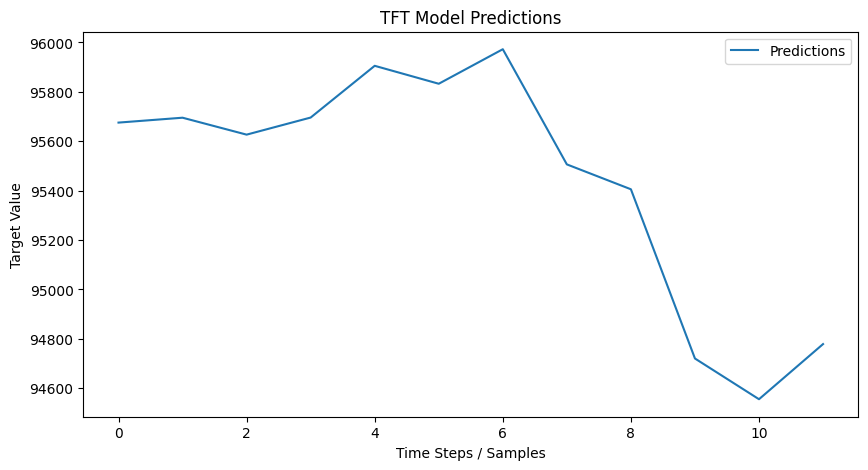

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(predictions_np, label='Predictions')

# If you have actual values, plot them too


plt.xlabel('Time Steps / Samples')
plt.ylabel('Target Value')
plt.title('TFT Model Predictions')
plt.legend()
plt.show()

In [ ]:
import yfinance as yf
new_df = yf.download('BTC-USD', interval='15m', period="60d")